/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:6531: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
sh: 1: temp.txt: not found


Duplicates removed: 154
Grid saved to: EA_Nodes_10.0_xyz.txt


100%|██████████████████████████████████████| 301/301 [00:00<00:00, 22832.23it/s]


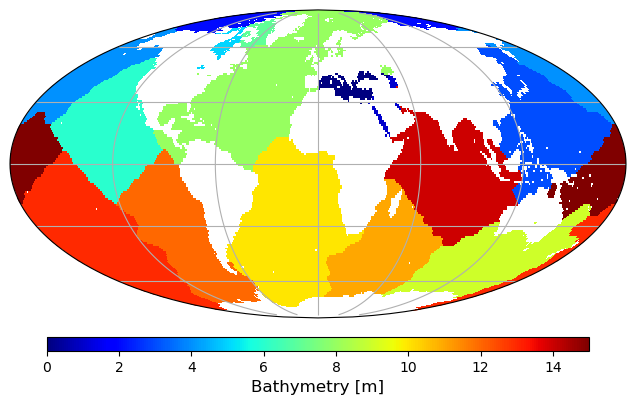

In [2]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np
import networkx as nx



# Initial basin definition class
body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

# Define basins based on user input boundaries
basins.defineBasins(minBasinCnt = 3,
                    method = "Louvain",
                    reducedRes={"on":True,"factor":10},
                    read=False,
                    write=True,
                    verbose=False)



basins.interp2regularGrid(mask=True)


EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                    outputDir = os.getcwd(),
                    fidName = "plotGlobal.png",
                    cmapOpts={"cmap":"jet",
                              "cbar-title":"cbar-title",
                              "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                    pltOpts={"valueType": "Bathymetry",
                             "valueUnits": "m",
                             "plotTitle":"",
                             "plotZeroContour":False},
                    savePNG=False,
                    saveSVG=False)